**# Test only - Use this notebook to test the Models Created in Task1.ipynb**

# Part 1: Lyric Genre Prediction Task - 45% (of project total)

### This git clone can take about **3 minutes**... maybe take a wee break 🥐 

In [27]:
%%time
!rm -rf /home/deep_learning_lyrics
!git clone --progress https://gitlab.com/dogmountain/deep_learning_lyrics.git /home/deep_learning_lyrics

Cloning into '/home/deep_learning_lyrics'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 139 (delta 31), reused 0 (delta 0), pack-reused 32
Receiving objects: 100% (139/139), 615.15 MiB | 3.82 MiB/s, done.
Resolving deltas: 100% (41/41), done.
Checking out files: 100% (72/72), done.
CPU times: user 1.64 s, sys: 252 ms, total: 1.89 s
Wall time: 3min 11s


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import pickle
import tensorflow_hub as hub

In [30]:
WORKDIR = "/home/deep_learning_lyrics"

## function to get the test set, I have a test set included in the repo


In [31]:
def give_me_the_test_set():
  test_df = pd.read_csv(os.path.join(WORKDIR, 'test_df.csv'))
  test_df = test_df.astype('string')
  with open(os.path.join(WORKDIR, 'categories.pickle'), 'rb') as f:
      categories = pickle.load(f)
  test_df["Genre"] = pd.Categorical(test_df["Genre"], categories=categories)
  test_lyrics = test_df["Lyrics"].to_numpy()
  test_genres = test_df["Genre"].cat.codes.to_numpy()
  return test_lyrics, test_genres

## Load Model 6. CNN

782/782 [==============================] - 17s 22ms/step
[[   0    0    5    0    0    3    0   36    0  145]
 [   0    0    1    0    0    1   17  108    0   73]
 [   0    0   93    0    0   29   11  175    0  509]
 [   0    0    0    1    0    0    7  200    0   16]
 [   0    0   13    0   22   11   30  282    0  366]
 [   0    0   15    0    1  683    6  267    0  359]
 [   0    0    6    0    2    1  979  321    0  604]
 [   0    0   25    2    2   95  143 6425    0 1938]
 [   0    0    1    0    0    7   10  156    6   97]
 [   0    0   64    2    5  133  310 2367    0 7834]]
              precision    recall  f1-score   support

     Country       0.00      0.00      0.00       189
  Electronic       0.00      0.00      0.00       200
        Folk       0.42      0.11      0.18       817
     Hip-Hop       0.20      0.00      0.01       224
       Indie       0.69      0.03      0.06       724
        Jazz       0.71      0.51      0.60      1331
       Metal       0.65      0.51

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


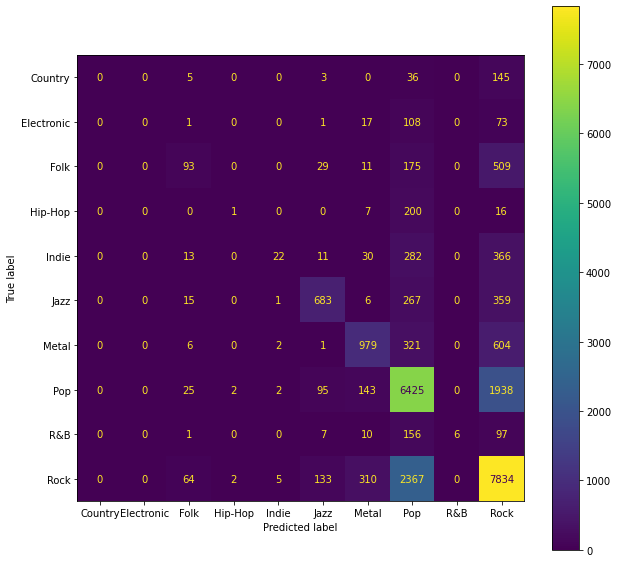

In [32]:
save_name = "train_model_embedding_with_cnn"
model = tf.keras.models.load_model(os.path.join(WORKDIR, save_name))
test_lyrics, test_genres = give_me_the_test_set()
model.evaluate(x=test_lyrics,
                y=test_genres,
                batch_size=128,
                verbose=1)
predictions = model.predict(x=test_lyrics, verbose=1)
test_preds = np.argmax(predictions, axis=1)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_genres, test_preds))
from sklearn.metrics import classification_report
with open(os.path.join(WORKDIR, 'categories.pickle'), 'rb') as f:
    categories = pickle.load(f)
print(classification_report(test_genres, test_preds, target_names=categories))
from sklearn.metrics import accuracy_score
print("accuracy_score", accuracy_score(test_genres, test_preds))
from sklearn.metrics import balanced_accuracy_score
print("balanced_accuracy_score", balanced_accuracy_score(test_genres, test_preds))
#random performance would score 0, while keeping perfect performance at a score of 1
print("balanced_accuracy_score (adjusted)", balanced_accuracy_score(test_genres, test_preds, adjusted=True))
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(test_genres, predictions)
print("SparseCategoricalAccuracy", m.result().numpy())
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_genres, test_preds, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

## Available modes from Task1:

In [28]:
!ls /home/deep_learning_lyrics | grep train_model | grep -v .csv

train_model_basic_rnn
train_model_double_lstm
train_model_embedding_with_cnn
train_model_embedding_with_cnn_2Conv1D
train_model_embedding_with_cnn_sampler
train_model_embedding_with_cnn_sampler_dropout
train_model_embedding_with_cnn_sampler_over
train_model_embedding_with_cnn_stopoverfitting
train_model_lstm
train_model_LSTM_with_embedding_pretrained_glove
train_model_multi_hot_2ngram_1
train_model_multi_hot_2ngram_1_task2


# Test Any Model, just give the name from the list above. 

In [33]:
save_name = ""

In [ ]:
model = tf.keras.models.load_model(os.path.join(WORKDIR, save_name))
test_lyrics, test_genres = give_me_the_test_set()
model.evaluate(x=test_lyrics,
                y=test_genres,
                batch_size=128,
                verbose=1)
predictions = model.predict(x=test_lyrics, verbose=1)
test_preds = np.argmax(predictions, axis=1)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_genres, test_preds))
from sklearn.metrics import classification_report
with open(os.path.join(WORKDIR, 'categories.pickle'), 'rb') as f:
    categories = pickle.load(f)
print(classification_report(test_genres, test_preds, target_names=categories))
from sklearn.metrics import accuracy_score
print("accuracy_score", accuracy_score(test_genres, test_preds))
from sklearn.metrics import balanced_accuracy_score
print("balanced_accuracy_score", balanced_accuracy_score(test_genres, test_preds))
#random performance would score 0, while keeping perfect performance at a score of 1
print("balanced_accuracy_score (adjusted)", balanced_accuracy_score(test_genres, test_preds, adjusted=True))
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(test_genres, predictions)
print("SparseCategoricalAccuracy", m.result().numpy())
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_genres, test_preds, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()